# KAMP 제조 AI 데이터셋 Study

---

## MTadGAN


##### 1. GAN이란?

- GAN(Generative Adversarial Network)은 인공지능에서 사용하는 생성 모델 중 하나이다.

- Ian Goodfellow와 동료가 2014년에 제안한 모델로, 서로 경쟁하는 두 개의 신경망(생성자와 판별자)을
사용하여 데이터를 생성하고 그 데이터를 실제 데이터와 구별하는 과정에서 학습한다.

  1. 판별자 학습

  - 실제 데이터와 생성된 데이터를 구별하도록 판별자를 학습

  - 이 단계에서 판별자는 실제 데이터에는 1 (진짜), 생성된 데이터에는 0 (가짜)를 출력하도록 학습

  2. 생성자 학습

  - 생성자는 판별자를 속이도록 학습

  - 즉, 생성자가 만든 데이터가 판별자에 의해 실제 데이터로 인식되도록 학습
  
  - 생성자는 판별자의 출력을 최대화(실제 데이터로 인식)하도록 학습

- GAN은 이미지 생성, 이미지 복원, 스타일 변환, 데이터 증강, 텍스트 생성 등 다양한 분야에서 사용됨

- GAN의 특징은 생성된 데이터의 품질이 매우 높고, 다양한 생성 작업에 유용하게 활용될 수 있음

- 하지만 학습 과정이 불안정할 수 있고, 많은 계산 자원이 필요한 단점이 존재함
  - [참고] https://brunch.co.kr/@kakao-it/162 링크를 참조하여 학습이 어려운 이유를 참고
  1. Convergence
    - GAN 가치 함수를 뉴럴 네트워크를 이용해 풀었을 때 이상적인 전역해로 수렴한다는 보장이 없음
  
  2. Mode Collapse
    - GAN 학습은 최빈값에만 함몰되는 모델으로 목표 분포의 수가 많으면 가장 많은 최빈값에만 함몰되는 경향이 있음
  
  3. Evaluation
    - 생성된 이미지의 질을 평가할 때 객관적인 기준을 정하기가 어려우므로 평가의 객관성 문제가 있음

- #### GAN의 불안정한 학습을 보완하고자 Time seriesAnomaly Detection Generative Adversarial Networks(=TadGAN)은 Loss Function을 차별화하여 어려움을 해결하고자 함

---

##### 2. TadGAN
[참고] https://lwoongh38.github.io/tadgan-lossfunction

1. GAN의 Loss Function

- GAN에서 기본적으로 사용하는 loss function은 KL divergence와 JSD divergence를 유도한다.

  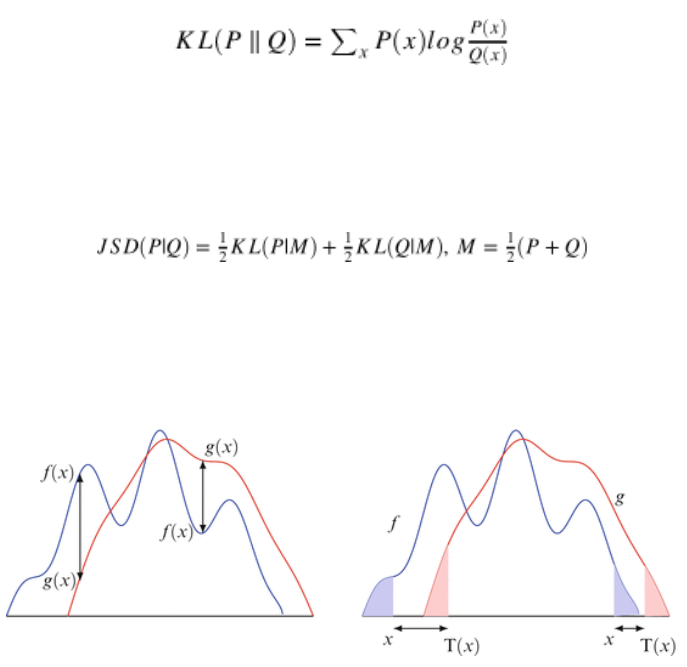

  - KL, JSD를 이용해서 f(x)로 표현된 분포를 g(x)의 분포가 되도록 학습시켜야 함
    - 왼쪽과 오른쪽 부분이 서로 같아지도록 만들어줘야함
  
  - 그러나 두 분포에 대해서 x, T(x) 값이 달라지면 KL, JSD는 같은 기준값을 가진 확률들만 계산하도록 고안된 확률거리 함수라서 기준값이 달라지면 항상 무한대의 값, 혹은 일정한 값만 나오게 되므로 학습을 할 수 없음

  - 따라서 TadGAN에서는 새로운 loss function을 차용하는데, 그것이 wgan-gp

2. wgan-gp

- wgan-gp는 Wasserstein GAN + gradient panely를 합친 용어

  - Wasserstein distance

    - KL, JSD가 가지는 한계는 어떤 확률 집합, 혹은 확률함수 등이 주어질 때 항상 같은 값에서만 비교가 가능

    - 만약, 다른 값에 대해서 얼마나 거리가 떨어져 있는 지를 확인한다면, KL과 JSD는 아래의 값만 전달

      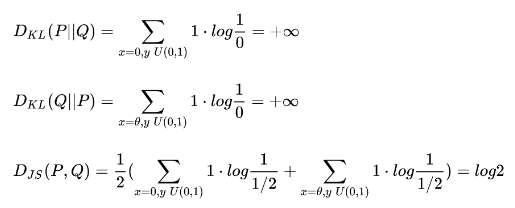

    - 다만, 무작위로 주어지는 확률 집합, 확률 함수들은 특수한 경우를 제외하고는 분포가 같을 수 없음

    - 따라서, TadGAN에서는 다른 분포를 가지는 확률 함수들에 대해서 값을 비교하기 위해 Wassertein distance를 채택

    - Wasserstein distance는 KL과 JSD가 다른 값에 대해서 서로 같은 확률을 가질 때 무한 대의 값이나 일정값만을 출력한다면, Wasserstein distance는 다른 분포에 대한 거리 정보까지 담고 있음
      - ex) 같은 확률일지라도 distance가 가장 짧은 값을 산출함 참고 링크에서 확인할 것
    
    - EM distance, Wasserstein-1 거리계산 식 (참고용)

      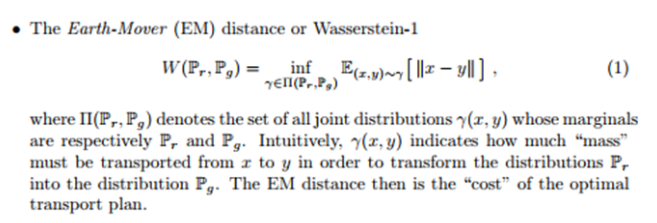
      - 집합 r과 집합 g에서 사건이 동시에 발생할 때 가능한 모든 확률 중에서, L2 norm 공식을 적용했을 때 임의로 선택된 x, y의 확률의 차이와 값의 차이가 가장 작은 것을 Wasserstein distance라고 정함
    
    - 따라서, Wasserstein distance는 어떤 사건이 동시에 발생했을 때, 두 사건이 가지는 확률과 분포가 달라지는 경우가 발생함

    - 기존 KL, JSD로 충분히 계산이 가능하겠지만, 분포가 다르면 KL는 무한대로, JSD는 log2의 값만 나타내지만 Wasserstein distance는 분포가 다르더라도 분포의 차이, 그리고 확률의 차이를 동시에 고려한다.

---

3. MTadGAN

- MTadGAN은 기본적으로 TadGAN의 다변량 버전이다.

- 다변량 시계열 데이터의 이상 탐지를 위해 설계된 모델이며, 여러 변수 간의 상호 의존성을 고려하여 복잡한 패턴을 더 효과적으로 탐지할 수 있도록 고안된 모델

- MTadGAN의 주요 특징

  1. 다변량 시계열 데이터 처리
    - 여러 변수가 포함된 시계열 데이터를 동시에 분석 (상관관계를 고려하여 이상치 탐지)
  
  2. 다중 스케일 분석
    - MTadGAN은 다양한 시간 스케일에서 데이터를 분석하여 다양한 유형의 이상치를 탐지 (단일 스케일 분석보다 더 정교한 이상 탐지)
  
  3. 다변량 관계 유지
    - 다변량 데이터의 상호 의존성을 유지하면서 이상 탐지를 수행


